In [43]:
# pip install yfinance

In [44]:
import yfinance as yf

In [45]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [46]:
stock = "GOOG"
google_data = yf.download(stock, start=start, end=end)


[*********************100%***********************]  1 of 1 completed


In [47]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-09-20,2.912832,3.028648,2.908349,2.972857,2.965574,213585582
2004-09-21,2.984065,2.999258,2.926780,2.934999,2.927809,145262446
2004-09-22,2.924040,2.980578,2.909345,2.948448,2.941225,152344894
2004-09-23,2.959906,3.054302,2.914575,3.009221,3.001849,171524515
2004-09-24,3.012209,3.090914,2.982820,2.984563,2.977252,183336625


In [48]:
google_data.shape

(5033, 6)

In [49]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5033.000000,5033.000000,5033.000000,5033.000000,5033.000000,5.033000e+03
mean,46.223525,46.711455,45.760917,46.243778,46.133453,1.146409e+08
std,44.254781,44.744575,43.819248,44.284908,44.184791,1.492054e+08
min,2.912832,2.980578,2.908349,2.934999,2.927809,1.584340e+05
25%,13.113846,13.244108,12.977109,13.120322,13.088181,2.706600e+07
50%,27.288080,27.481548,27.006853,27.290573,27.223717,5.370480e+07
75%,61.215000,61.700001,60.534000,61.008499,60.859039,1.405248e+08
max,191.750000,193.309998,190.619995,192.660004,192.406723,1.650833e+09


In [50]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5033 entries, 2004-09-20 to 2024-09-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5033 non-null   float64
 1   High       5033 non-null   float64
 2   Low        5033 non-null   float64
 3   Close      5033 non-null   float64
 4   Adj Close  5033 non-null   float64
 5   Volume     5033 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.2 KB


In [51]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

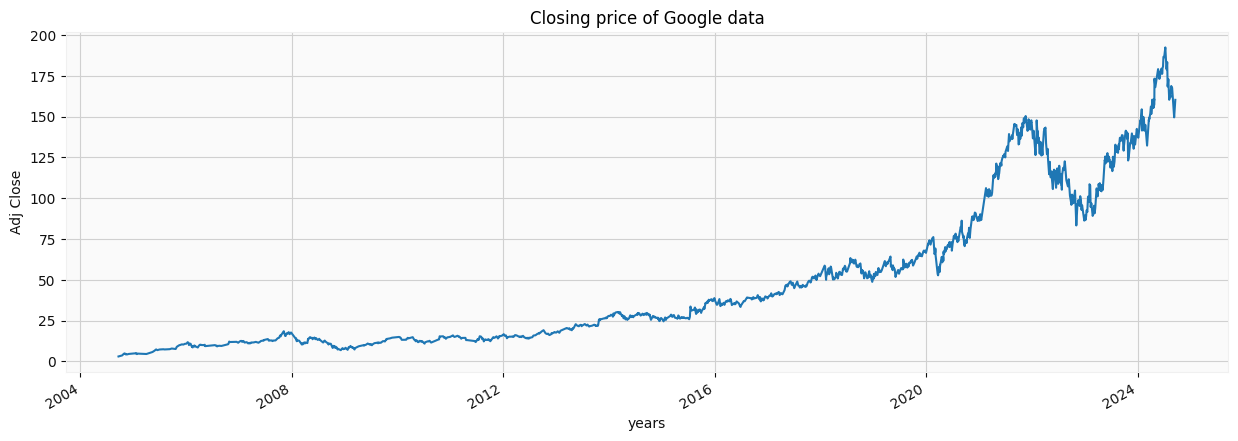

In [53]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [54]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    

In [55]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

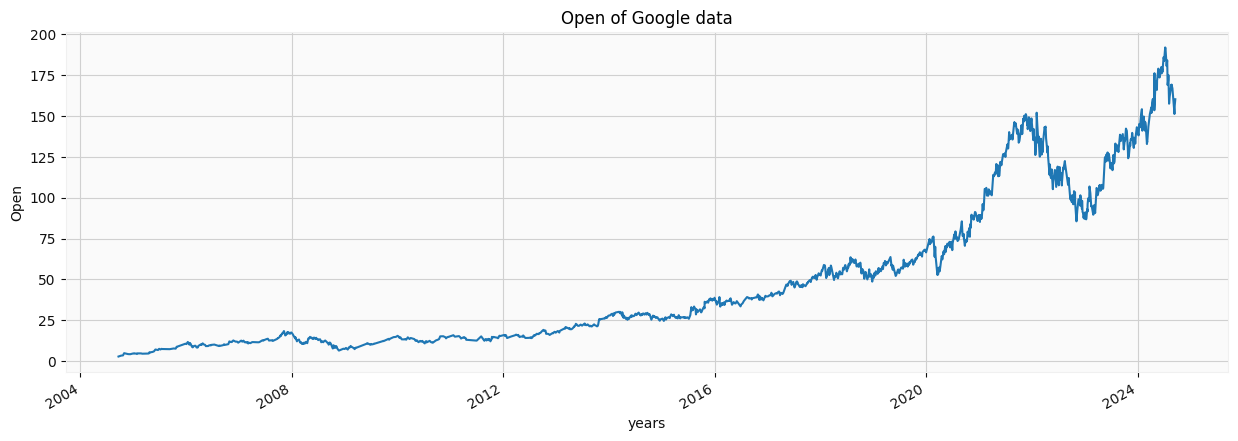

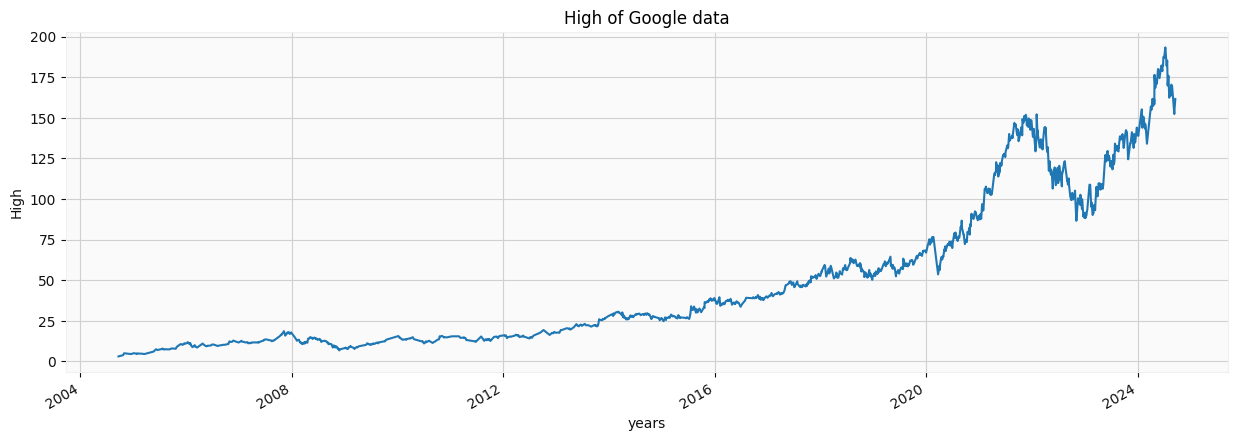

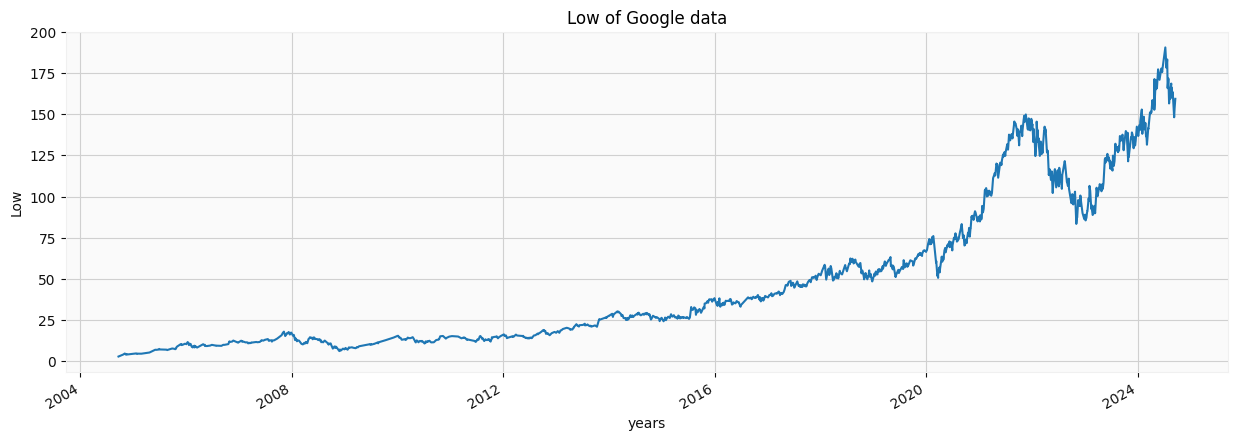

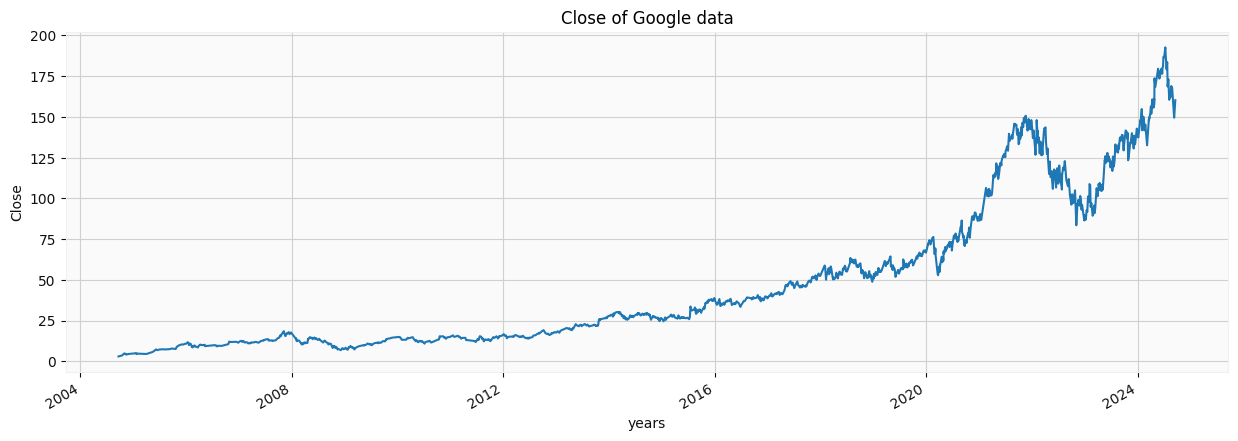

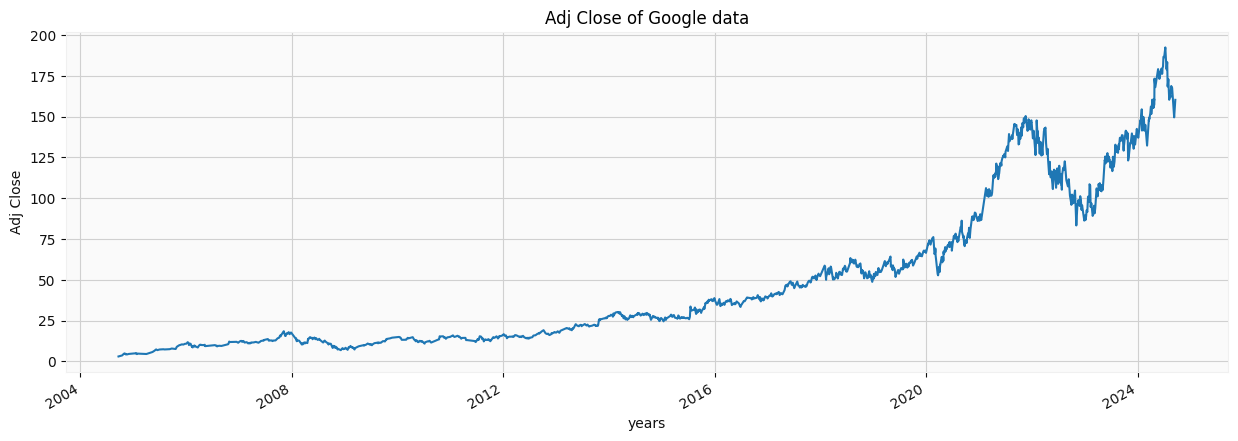

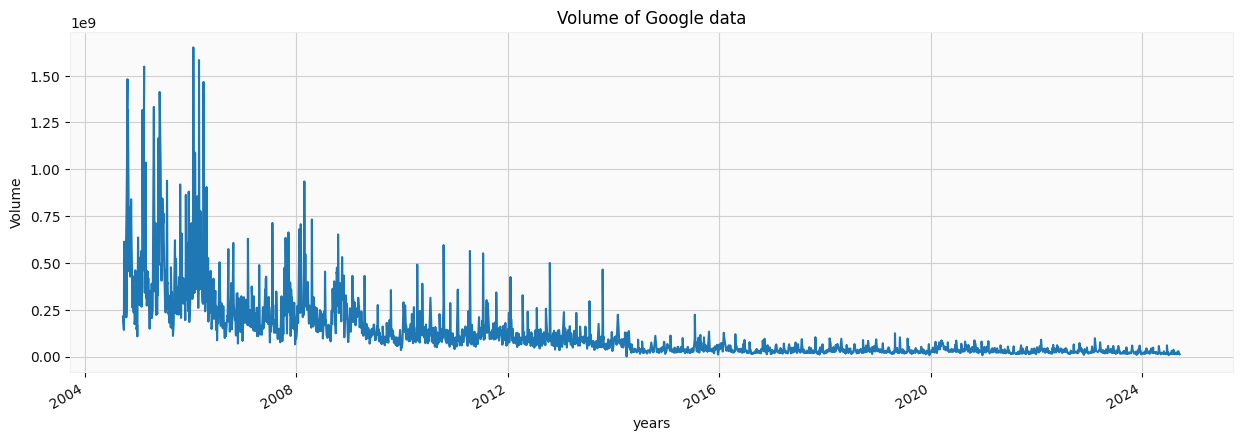

In [56]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [57]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [58]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [59]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [60]:
# Calculate moving average (MA) over a window of 5
data['MA'] = data.rolling(5).mean()

# Display the data
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [61]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 73
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 179


In [62]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [63]:
google_data['MA_for_250_days'][0:250].tail()

Date
2005-09-08         NaN
2005-09-09         NaN
2005-09-12         NaN
2005-09-13         NaN
2005-09-14    5.404058
Name: MA_for_250_days, dtype: float64

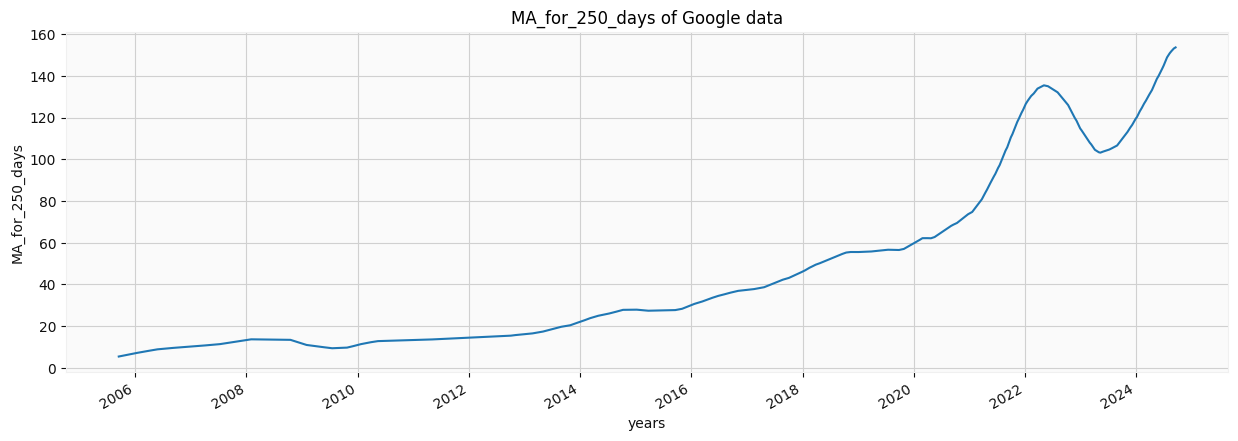

In [64]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

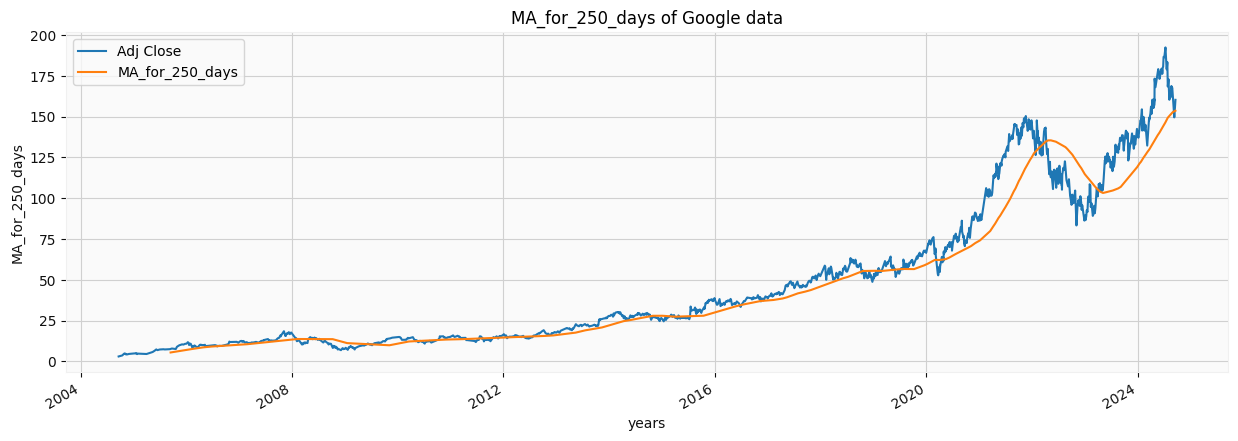

In [65]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

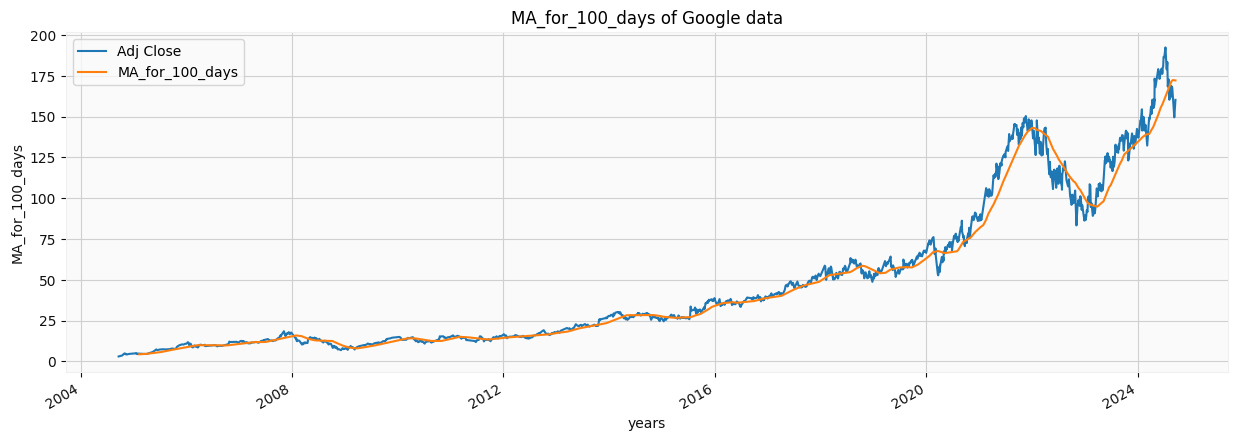

In [66]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

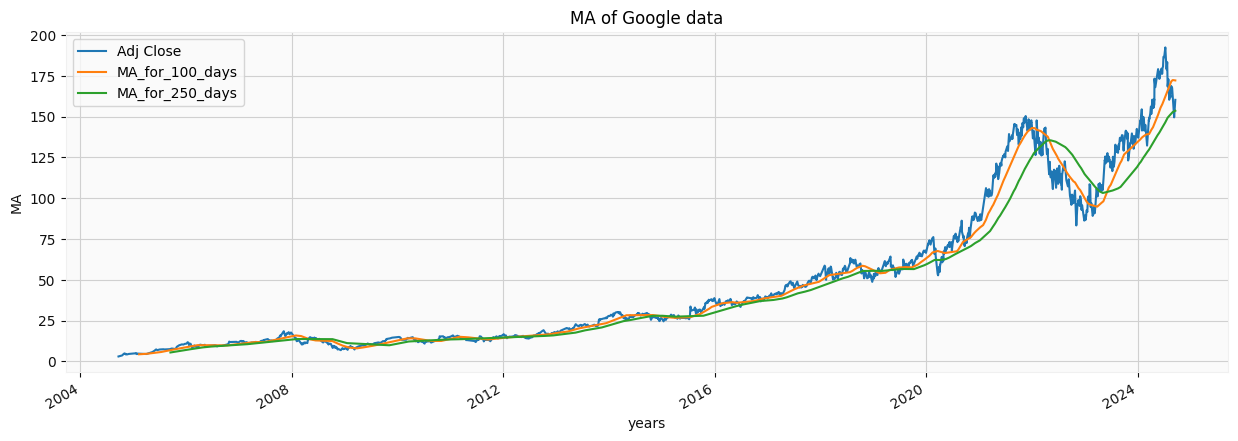

In [67]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [68]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-09-20,2.965574,NaN
2004-09-21,2.927809,-0.012735
2004-09-22,2.941225,0.004582
2004-09-23,3.001849,0.020612
2004-09-24,2.977252,-0.008194


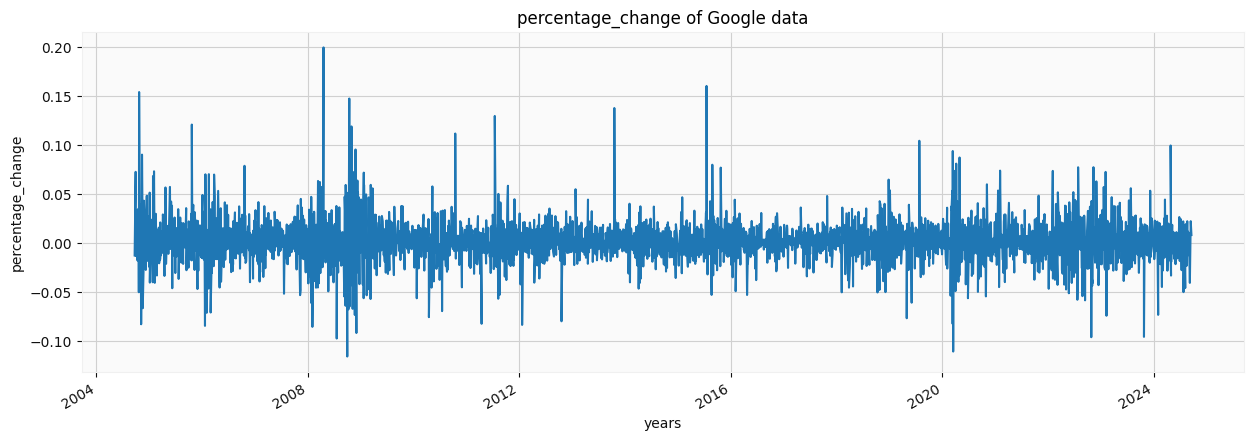

In [69]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [71]:
Adj_close_price = google_data[['Adj Close']]

In [72]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([192.40672302]), array([2.92780876]))

In [73]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[1.99312430e-04],
       [0.00000000e+00],
       [7.08049860e-05],
       ...,
       [8.20366672e-01],
       [8.23638859e-01],
       [8.30446969e-01]])

In [74]:
len(scaled_data)

5033

In [75]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [76]:
x_data[0],y_data[0]

(array([[1.99312430e-04],
        [0.00000000e+00],
        [7.08049860e-05],
        [3.90756801e-04],
        [2.60940740e-04],
        [5.50751584e-05],
        [1.18275821e-03],
        [1.73611067e-03],
        [1.54204152e-03],
        [1.93279958e-03],
        [2.25798964e-03],
        [2.69201636e-03],
        [2.52286629e-03],
        [2.75495581e-03],
        [2.60809752e-03],
        [2.28421734e-03],
        [2.56482634e-03],
        [3.02376586e-03],
        [3.16800314e-03],
        [3.44468125e-03],
        [4.10686912e-03],
        [3.94689573e-03],
        [2.97000435e-03],
        [4.13571532e-03],
        [7.15817508e-03],
        [9.12112821e-03],
        [8.38682548e-03],
        [8.93362102e-03],
        [9.89477502e-03],
        [9.54597826e-03],
        [1.02527472e-02],
        [1.01006456e-02],
        [9.68103508e-03],
        [8.76708944e-03],
        [6.75430317e-03],
        [7.17390365e-03],
        [6.66907445e-03],
        [6.55892414e-03],
        [8.5

In [77]:

int(len(x_data)*0.7)

3453

In [78]:
4908-100-int(len(x_data)*0.7)

1355

In [79]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [80]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3453, 100, 1)
(3453, 1)
(1480, 100, 1)
(1480, 1)


In [81]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [82]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [83]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [84]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2

3453/3453 [==============================] - 83s 23ms/step - loss: 1.1132e-04
Epoch 2/2
3453/3453 [==============================] - 77s 22ms/step - loss: 6.1427e-05


In [85]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 128)          66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
predictions = model.predict(x_test)

47/47 [==============================] - 2s 20ms/step


In [87]:
predictions

array([[0.2743012 ],
       [0.26763907],
       [0.2645013 ],
       ...,
       [0.8125044 ],
       [0.82570326],
       [0.8334078 ]], dtype=float32)

In [88]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 54.902103],
       [ 53.63977 ],
       [ 53.04523 ],
       ...,
       [156.88026 ],
       [159.38116 ],
       [160.84102 ]], dtype=float32)

In [89]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 50.87905121],
       [ 51.68357468],
       [ 53.70660782],
       ...,
       [158.36999512],
       [158.99000549],
       [160.27999878]])

In [90]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [91]:
rmse

3.3375181457008827

In [92]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2018-10-29,50.879051,54.902103
2018-10-30,51.683575,53.639771
2018-10-31,53.706608,53.045231
2018-11-01,53.368938,53.728878
2018-11-02,52.759930,54.244808


<Figure size 640x480 with 0 Axes>

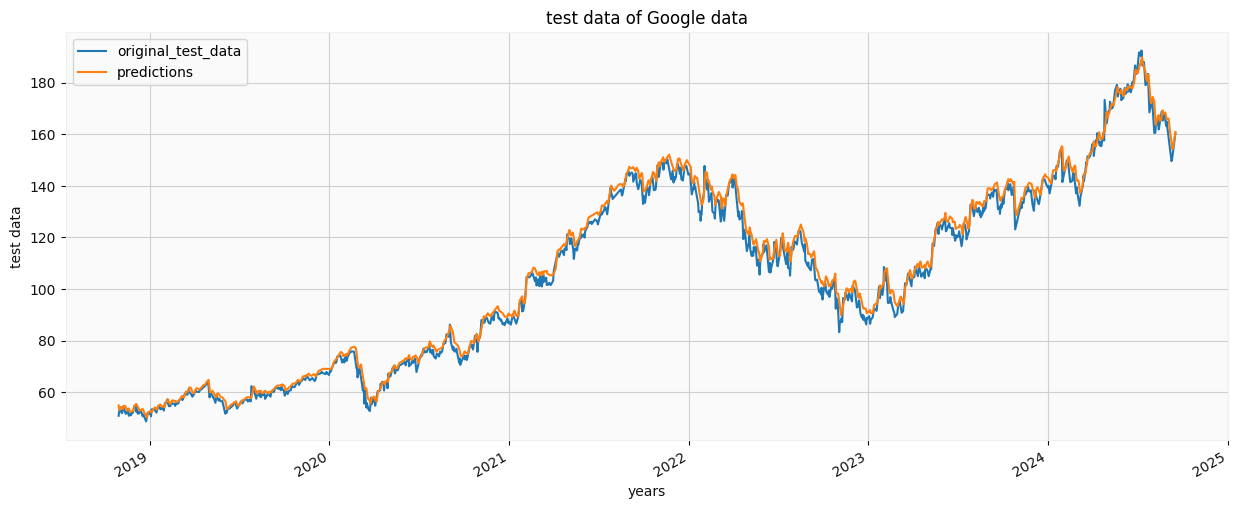

In [93]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

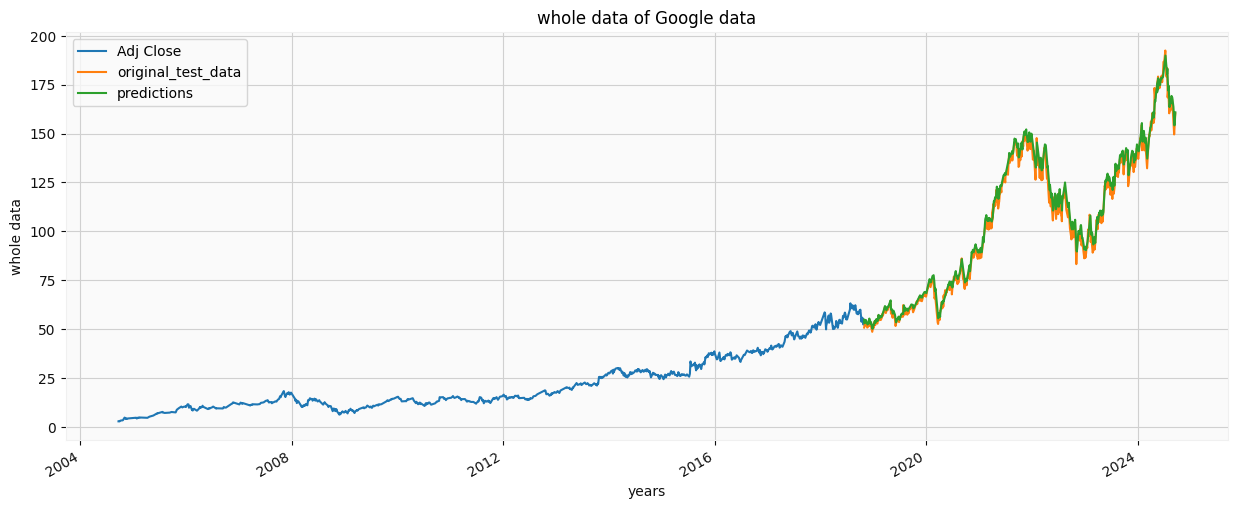

In [138]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [139]:
model.save("Latest_stock_price_model.keras")

In [96]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(inv_y_test, inv_predictions)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 11.139027372882659


In [97]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 3.3375181457008827


In [98]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(inv_y_test, inv_predictions)
print(f"Mean Absolute Percentage Error: {mape}")


Mean Absolute Percentage Error: 0.02504289883097212


In [99]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(x_data):
    x_train, x_test = x_data[train_index], x_data[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]
    # Train and evaluate your model here


In [100]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'batch_size': [1, 2, 4],
    'epochs': [2, 5, 10]
}

# Implement GridSearchCV (though it's a bit tricky with Keras, you can wrap the model)


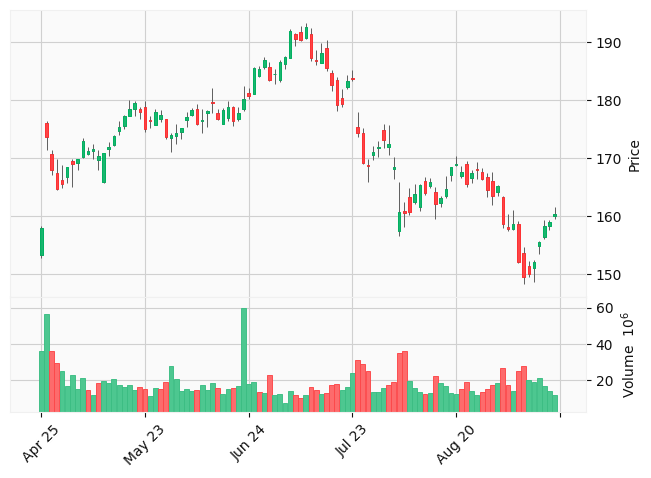

In [122]:
import mplfinance as mpf
mpf.plot(google_data[-100:], type='candle', volume=True, style='yahoo')


In [123]:
import streamlit as st

st.title("Stock Price Prediction")
stock = st.text_input("Enter Stock Ticker", "GOOG")
# Add your model loading and prediction logic here


2024-09-18 11:33:13.473 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-18 11:33:13.474 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-18 11:33:13.474 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-18 11:33:13.475 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-18 11:33:13.476 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-18 11:33:13.476 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-18 11:33:13.477 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [124]:
from datetime import datetime, timedelta


In [129]:
stock = st.text_input("Enter Stock Ticker", "GOOG")
start_date = st.date_input("Start Date", datetime.now().date() - timedelta(days=365))
end_date = st.date_input("End Date", datetime.now().date())


2024-09-18 11:37:31.656 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-18 11:37:31.657 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-18 11:37:31.658 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-18 11:37:31.658 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-18 11:37:31.659 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-18 11:37:31.660 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-18 11:37:31.660 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-18 11:37:31.661 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar